In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Description
Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones.
We are predicting column 'Exited'

In [2]:
# read raw dataset
df = pd.read_csv('Churn_Modelling.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# see what the data looks like
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [6]:
# check for nulls
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

## Visuals

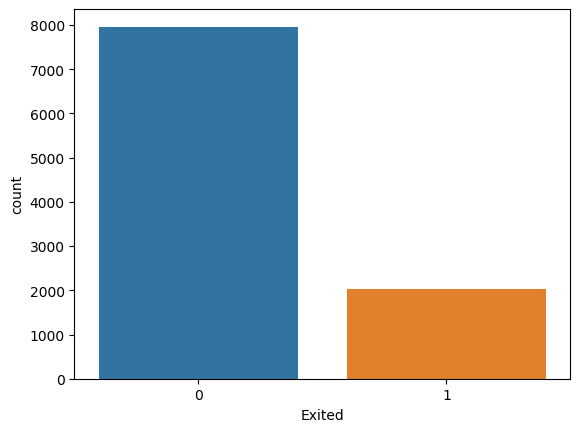

In [8]:
# visualise the dependent variable (what we are trying to predict)
sns.countplot(x = 'Exited', data = df)

Replacing gender and geog with dummies

In [9]:
# # methods selected only consider numerical features (not categorical)
# # absence of male implies femal
# gender_dummy = pd.get_dummies(df['Gender'],drop_first = True)
# # absence of germany and spain does not imply france, so include dummy for all
# geography_dummy = pd.get_dummies(df['Geography'])
# df = pd.concat([df.drop('Gender',axis=1),gender_dummy],axis=1)
# df = pd.concat([df.drop('Geography',axis=1),geography_dummy],axis=1)

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


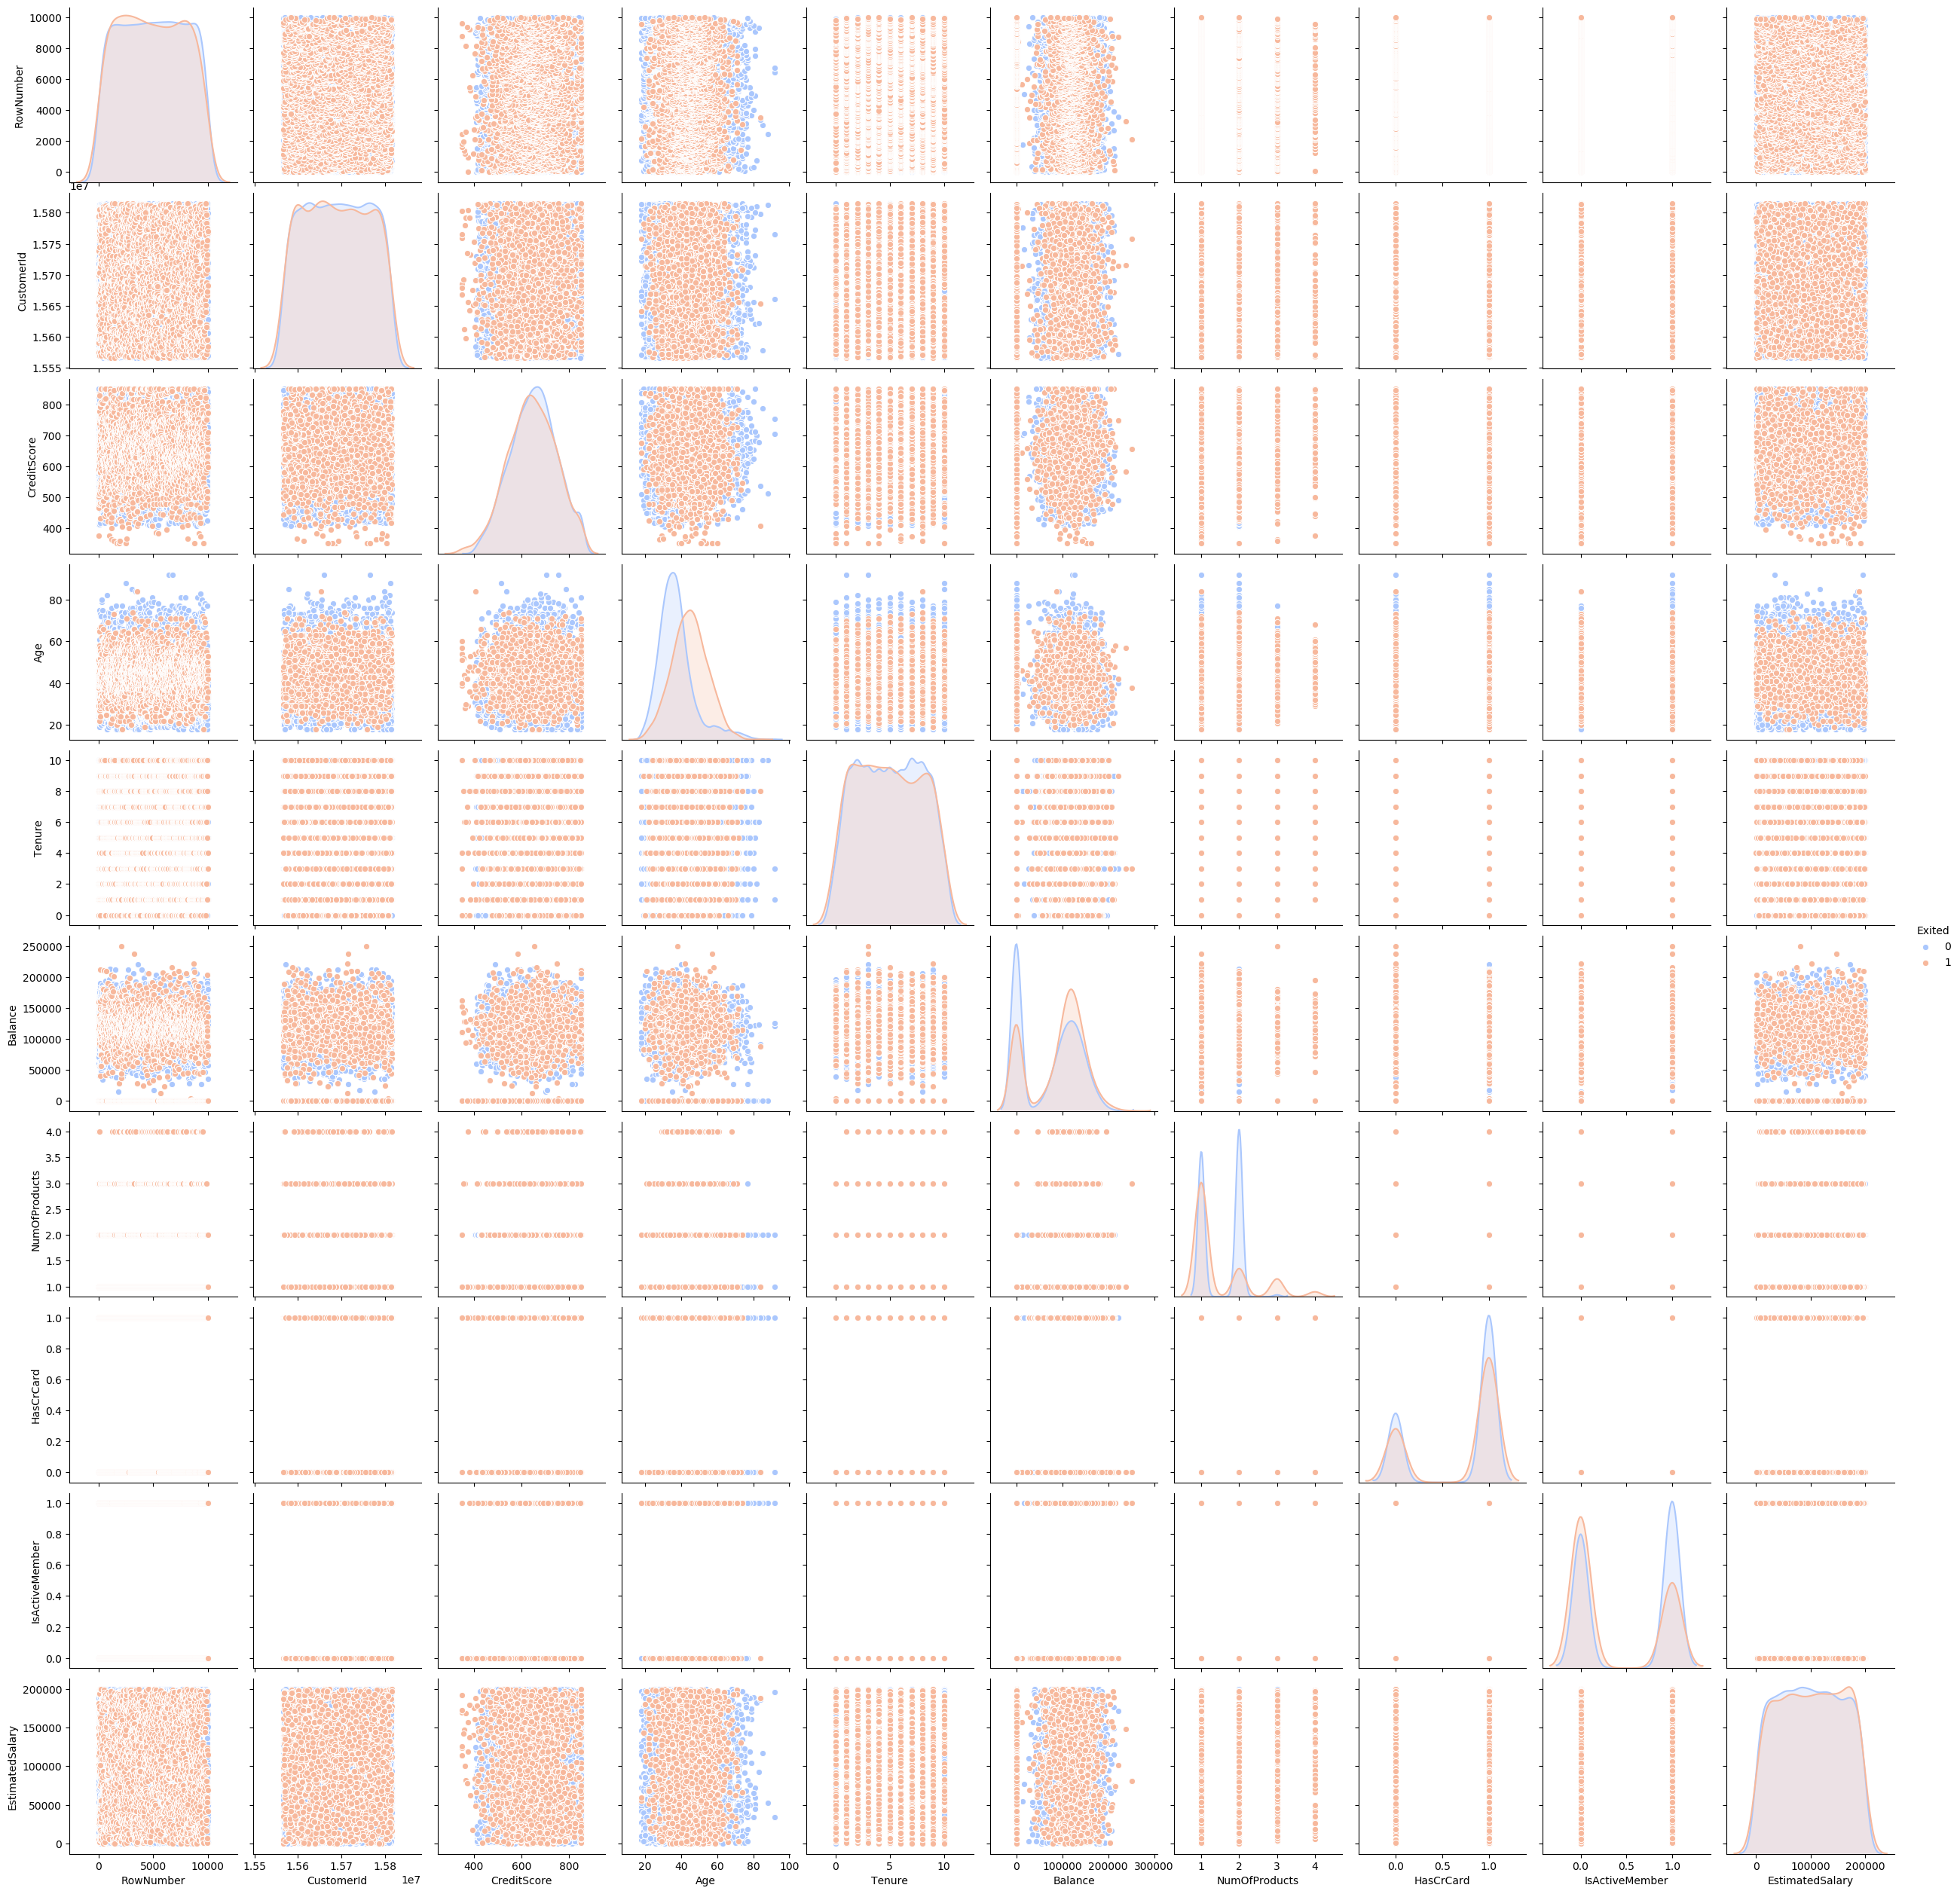

In [11]:
# # see the relationships
sns.pairplot(df,hue='Exited',palette='coolwarm')

# here we can see that there is a big patch of exited from ages 45 to 65
# so we want to make age a bucketed variable
# visualise the dependent variable (what we are trying to predict)
sns.scatterplot(x = 'Balance', y='Age',hue='Exited',data = df)

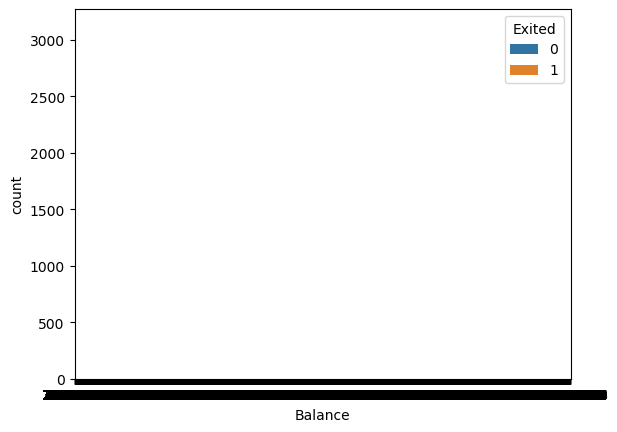

In [12]:
# visualise the dependent variable (what we are trying to predict)
# sns.countplot(x = 'Balance', hue='Exited',data = df)

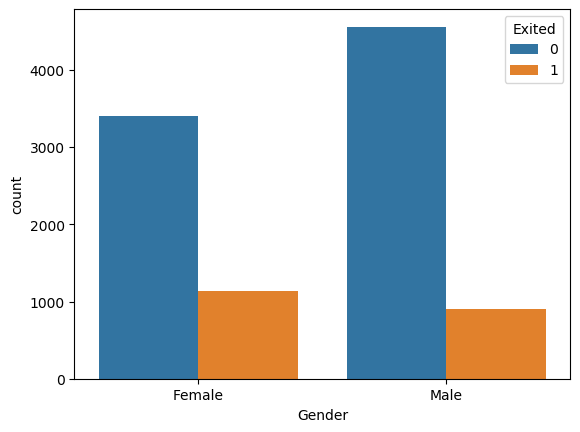

In [13]:
# visualise the dependent variable (what we are trying to predict)
sns.countplot(x = 'Gender', hue='Exited',data = df)

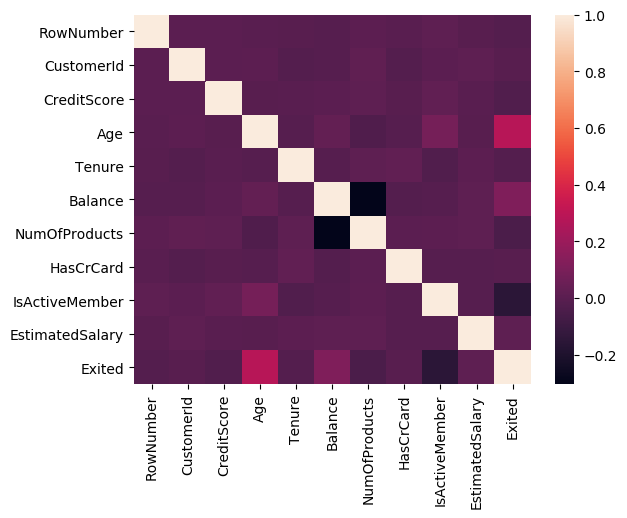

In [14]:
# which are the strongest features
sns.heatmap(df.corr())

In [ ]:
g = sns.FacetGrid(data=df,col='Gender')
g.map(plt.hist,'Age')

In [ ]:
g = sns.FacetGrid(data=df,col='IsActiveMember')
g.map(plt.hist,'Age')

In [ ]:
g = sns.FacetGrid(data=df,col='Gender')
g.map(plt.hist,'Balance')

In [ ]:
# have a closer look into the 'age' feature
plt.figure(figsize=(12,4))
sns.countplot(x='Age',data=df,hue='Exited',palette='coolwarm' )

In [ ]:
# g = sns.JointGrid(x="total_bill", y="tip", data=tips)
# g = g.plot(sns.regplot, sns.distplot)

In [ ]:
g = sns.FacetGrid(data=df,col='Exited')
g.map(plt.hist,'Age')

In [ ]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=df,hue='Exited')

In [ ]:
# sns.lmplot(x='Age',y='EstimatedSalary',data=df,col='Exited')
sns.boxplot(x='Exited',y='Age',data=df,palette='rainbow')

In [ ]:
sns.swarmplot(x='Exited',y='Age',data=df,palette='rainbow')

In [ ]:
# We can see from the above that being over 55 means you are an outlier in the data 